# Minimum variance portfolio

The minimum variance portfolio theory seeks to minimize the risk for a given level of return, the theory assumes that investors are risk-averse and seek to maximise their utility by choosing portfolios that give the highest expected return for a given level of risk.

The minimum variance portfolio is the portfolio of assets which have the lowest variance or standard deviation, which is a measure of the portfolios risk. 

## Import required libraries

Our project will require the import of the following libraries:
* `numpy` for mathematical operations
* `yfinance` for the scraping of financial data from the Yahoo Finance website
* `pandas` for data manipulation
* `plt` for data visualisations 
* `cvxpy` for convex optimization

In [39]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp

## Download and visualize the stock data

In [40]:
# stocks 
stocks = ['AAPL', 'BAC', 'DB', 'GE', 'KO','LMT', 'MCD', 'MSFT', 'NVDA', 'TSLA', 'UBS']

# Number of trading days
NUM_TRADING_DAYS = 252

# historical data - define START and END date
start_date = '2016-01-01'
end_date = '2020-01-01'


def download_data(stocks):
    # name of stock (key) - stock values (2012-2019) as values
    stock_data = {}
    
    for stock in stocks:
        # closing prices
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']
        
    return pd.DataFrame(stock_data)

def show_data(data):
    data.plot(figsize=(10, 5))
    plt.show()

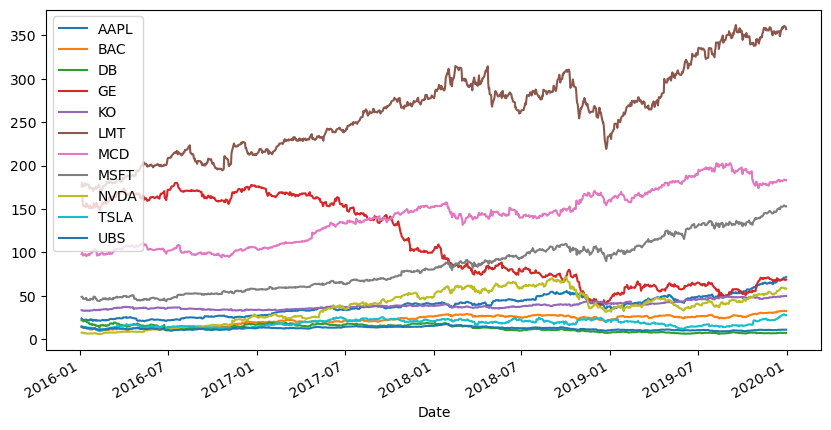

In [41]:
data = download_data(stocks)
show_data(data)

## Calculate log returns, mean and covariance

In [42]:
def log_returns(data):
    log_returns = np.log(data/data.shift(1))
    return log_returns[1:]

In [43]:
log_returns = log_returns(data)

In [44]:
def show_statistics(returns):
    mean = returns.mean() * NUM_TRADING_DAYS
    cov = returns.cov() * NUM_TRADING_DAYS
    return mean, cov

In [45]:
returns, covariance = show_statistics(returns)

## Define optimization problem

To solve the optimization problem, we use the `cvxpy` library. The steps we take to solve the optimization problem are as follows:
* Defines the size of the portfolio in `n_assets`
* The next line of code `weights = cp.Variable(n_assets)` creates a variable `weights` which is a column vector of length `n_assets`. By default, the library creates an unconstrained variable that can take on any value.
* Next, the code defines the calculation for risk in the model, which in this case is the `weight` vector multiplied by the `covariance` matrix.
* We then define the `constraints` in our model, which will be used later in the `cp.Problem` constructor:
   * The first constraint `cp.sum(weights)==1` specifies that the total weights must add to 1.
   * The second constraint `weights >= 0` specifies that the weights must be non-negative.
* Next, the code `cp.Minimize(risk)` defines the parameter we are looking to minimise which in this case is the risk and we call this the `objective` variable.
* Finally, the code `problem = cp.Problem(objective, constraints)` takes our objective and constraints, for which the optimal values of objective function are then solved for, by using the class method `problem.solve()` 

In [68]:
# Define optimization problem
n_assets = returns.size
weights = cp.Variable(n_assets)
risk = cp.quad_form(weights, covariance)
constraints = [cp.sum(weights) == 1, weights >= 0]
objective = cp.Minimize(risk)
problem = cp.Problem(objective, constraints)

# Solve optimization problem
problem.solve()

0.012269023487736305

In [72]:
# Returns the weights
min_variance_weights = np.round(weights.value, 3)

# Calculates the variance and returns
min_variance_return = np.round(np.dot(returns, min_variance_weights), 3)
min_variance_variance = np.round(cp.quad_form(cp.Constant(min_variance_weights), covariance).value, 3)

print("Weights of stock in minimum variance portfolio:\n")
for i, stock in enumerate(stocks):
    weight = min_variance_weights[i]
    print(f"The weight of the {stock} in our portfolio is {weight:,.2%}.")
    

print(f"\nThe return of the minimum variance portfolio is {min_variance_return:.3f}.")
print(f"The variance of the minimum variane portfolio is {min_variance_variance:.3f}.")

Weights of stock in minimum variance portfolio:

The weight of the AAPL in our portfolio is 4.80%.
The weight of the BAC in our portfolio is 1.50%.
The weight of the DB in our portfolio is 0.00%.
The weight of the GE in our portfolio is 3.90%.
The weight of the KO in our portfolio is 39.90%.
The weight of the LMT in our portfolio is 18.10%.
The weight of the MCD in our portfolio is 24.70%.
The weight of the MSFT in our portfolio is 0.00%.
The weight of the NVDA in our portfolio is 0.00%.
The weight of the TSLA in our portfolio is 0.70%.
The weight of the UBS in our portfolio is 6.30%.

The return of the minimum variance portfolio is 0.115.
The variance of the minimum variane portfolio is 0.012.
